In [320]:
%load_ext autoreload
%autoreload 1

import sys
import os

# This adds 'code/' to sys.path
code_dir = os.path.abspath(os.path.dirname(__file__)) if '__file__' in globals() else os.path.abspath('')
if code_dir not in sys.path:
    sys.path.append(code_dir)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [321]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.typing as npt

# Example of using the class

In [322]:
from sklearn.preprocessing import PolynomialFeatures

In [323]:
# Defining the Runge function
def f(x):
    return 1/(1+25*x**2)

n = 100
x = np.random.uniform(-1, 1, n)
y = f(x) + 0.01*np.random.normal(0, 1, n)

p = 5
X = PolynomialFeatures(p).fit_transform(x.reshape(-1, 1))
num_features = X.shape[1]

In [324]:
def MSE_gradient(X: npt.NDArray[np.floating], y: npt.NDArray[np.floating], theta: npt.NDArray[np.floating]):
    n = X.shape[0]
    return (2.0 / n) * X.T @ (X @ theta - y)

In [325]:
%aimport methods.training_methods, methods.step_methods, methods.regression_methods
from methods.training_methods import GradientDescent, StochasticGradientDescent
from methods.step_methods import ConstantGradientStep, MomentumGradientStep, ADAgradStep, RMSpropStep, AdamStep
from methods.regression_methods import OLS_Gradient, Ridge_Gradient

### Trying all step methods with normal gradient descent and using OLS

In [326]:
np.random.seed(1234)
theta = np.random.uniform(-1, 1, num_features)
iterations = 10000

In [327]:

gd_constant = GradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=ConstantGradientStep(learning_rate=0.02))
gd_momentum = GradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=MomentumGradientStep(learning_rate=0.02, momentum=0.7))
gd_ADAgrad = GradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=ADAgradStep(learning_rate=0.2))
gd_RMSprop = GradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=RMSpropStep(learning_rate=0.007, decay_rate=0.9))
gd_Adam = GradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=AdamStep(learning_rate=0.01, beta1=0.9, beta2=0.999))


mse_data_gd_constant_step = gd_constant.train(iterations=iterations, store_mse=True)
mse_data_gd_momentum = gd_momentum.train(iterations=iterations, store_mse=True)
mse_data_gd_ADAgrad = gd_ADAgrad.train(iterations=iterations, store_mse=True)
mse_data_gd_RMSprop = gd_RMSprop.train(iterations=iterations, store_mse=True)
mse_data_gd_Adam = gd_Adam.train(iterations=iterations, store_mse=True)

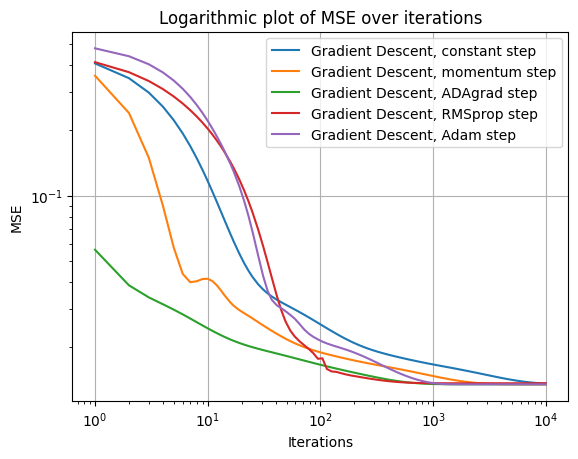

In [328]:
plt.plot(mse_data_gd_constant_step[0], mse_data_gd_constant_step[1], label='Gradient Descent, constant step')
plt.plot(mse_data_gd_momentum[0], mse_data_gd_momentum[1], label='Gradient Descent, momentum step')
plt.plot(mse_data_gd_ADAgrad[0], mse_data_gd_ADAgrad[1], label='Gradient Descent, ADAgrad step')
plt.plot(mse_data_gd_RMSprop[0], mse_data_gd_RMSprop[1], label='Gradient Descent, RMSprop step')
plt.plot(mse_data_gd_Adam[0], mse_data_gd_Adam[1], label='Gradient Descent, Adam step')

plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Logarithmic plot of MSE over iterations")
plt.loglog()
# plt.xscale("log")
# plt.yscale("log")
plt.grid()
plt.legend()
plt.show()

### Testing OLS vs Ridge

In [329]:
### Testing OLS vs Ridge
np.random.seed(1234)
theta = np.random.uniform(-1, 1, num_features)
iterations = 1000

In [330]:
### Testing OLS vs Ridge
gd_ADAgrad_stoch_OLS = StochasticGradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=ADAgradStep(learning_rate=0.2))
gd_ADAgrad_OLS = GradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=ADAgradStep(learning_rate=0.2))

mse_data_gd_ADAgrad_stoch_OLS = gd_ADAgrad_stoch_OLS.train(epochs=1000, n_batches = 2, store_mse=True)
mse_data_gd_ADAgrad_OLS = gd_ADAgrad_OLS.train(iterations=iterations, store_mse=True)

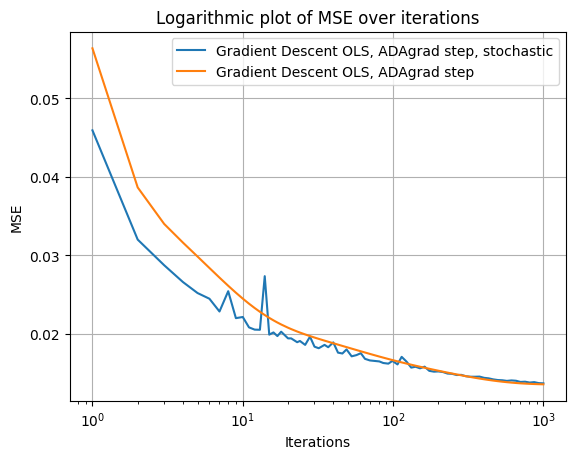

In [331]:
plt.plot(mse_data_gd_ADAgrad_stoch_OLS[0], mse_data_gd_ADAgrad_stoch_OLS[1], label='Gradient Descent OLS, ADAgrad step, stochastic')
plt.plot(mse_data_gd_ADAgrad_OLS[0], mse_data_gd_ADAgrad_OLS[1], label='Gradient Descent OLS, ADAgrad step')
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Logarithmic plot of MSE over iterations")
plt.xscale("log")
plt.grid()
plt.legend()
plt.show()